<a href="https://colab.research.google.com/github/RocafellaGitub/MaikanoRocafellaSteve/blob/main/TUTORIAL_WEEK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, log_loss, roc_auc_score, roc_curve
)
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn import tree
%matplotlib inline

# UPLOAD THE DATASETS

In [ ]:
import pandas as pd
df=pd.read_csv('IRIS.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (129, 5)

First 5 Rows:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,129.000000,129.000000,129.000000,129.000000
mean,5.716279,3.057364,3.476744,1.062791
std,0.794983,0.453075,1.739231,0.727804
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.200000
50%,5.600000,3.000000,4.000000,1.200000
75%,6.300000,3.400000,4.800000,1.600000
max,7.700000,4.400000,6.900000,2.500000


#CHECK THE DATASET DATATYPE

In [ ]:
pd.read_csv('IRIS.csv').dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


#DATASET DESCRIPTIVE ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  129 non-null    float64
 1   sepal_width   129 non-null    float64
 2   petal_length  129 non-null    float64
 3   petal_width   129 non-null    float64
 4   species       129 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.2+ KB


# LOOK FOR NULL VALUES  

In [ ]:
#df.isnull().sum()
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# UNIQUE VALUE

In [ ]:
#check number of classes in label
pd.unique(df['species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# PREPROCESSING THE DATASET
# ENCODE TARGET VARIABLE


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

pd.unique(df['species'])

array([0, 1, 2])

#CHECK FOR DATASET IMBALANCE


In [ ]:
print('number of samples in each class:')
df['species'].value_counts()

number of samples in each class:


,count
species,
0,50
1,50
2,29


#BOXPLOT MAP

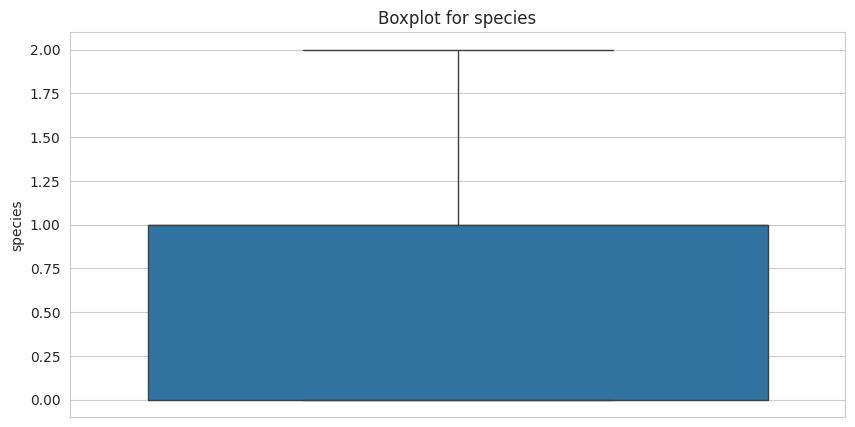

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(data=df['species'])
plt.title("Boxplot for species")
plt.show()

SOFTMAX MODEL - CORRELATION MAP

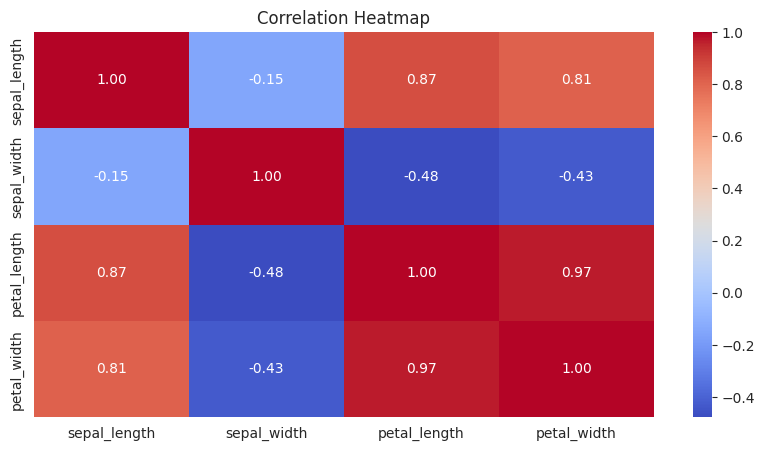

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
softmax=df.drop('species', axis=1)
corr=softmax.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# BALANCING THE DATASETS


In [ ]:
import pandas as pd
import numpy as np
# Re-load df and preprocess 'species' column to ensure it's available
df = pd.read_csv('IRIS.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

#balancing dataset
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df['species']), y=df['species'])
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(df['species']), class_weights)}

# Compute sample weights for each instance
sample_weights = compute_sample_weight(class_weight=class_weights_dict, y=df['species'])

In [ ]:
class_weights_dict

{np.int64(0): np.float64(0.86),
 np.int64(1): np.float64(0.86),
 np.int64(2): np.float64(1.4827586206896552)}

In [ ]:
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop('species', axis=1)
y = df['species']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(X_scaled, y, sample_weights, test_size=0.3, stratify=y, random_state=42)

In [ ]:
#building knn models
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn_selected=KNeighborsClassifier(n_neighbors=5)
#training models
#all features
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)


#selcted features
knn_selected.fit(X_train,y_train)
y_pred_knn1=knn_selected.predict(X_test)
#classification report

from sklearn.metrics import classification_report

print("nKNN Performance:")
print(classification_report(y_test, y_pred_knn))

print("nKNN_Selected Performance:")
print(classification_report(y_test, y_pred_knn1))

nKNN Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

nKNN_Selected Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39



CONFUSION MATRIX


<Axes: >

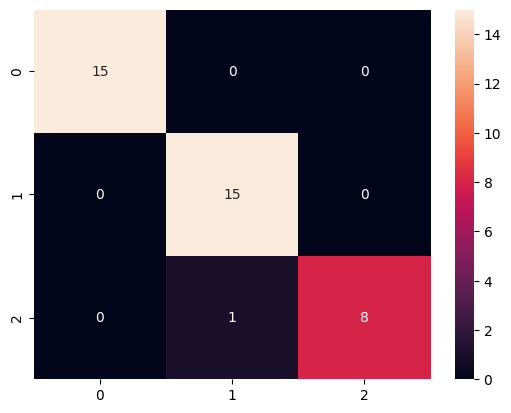

In [ ]:
#confusion: it show labelwise performance of the model

from sklearn.metrics import confusion_matrix
import seaborn as sns # Ensure seaborn is imported if not already in the session

cm=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot=True)

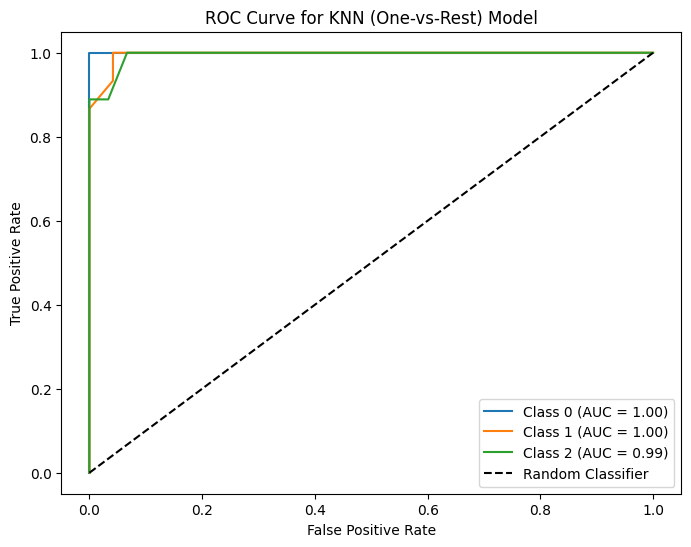

In [ ]:
#plot ROC curve for KNN all features model
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Get probability estimates for each class
y_score = knn.predict_proba(X_test)

# Binarize the true labels for a One-vs-Rest approach
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Get the number of classes
n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(8, 6))

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {lb.classes_[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Diagonal random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN (One-vs-Rest) Model')
plt.legend(loc='lower right')
plt.show()

### Building Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)

# Print classification report
from sklearn.metrics import classification_report
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.90      0.60      0.72        15
           2       0.57      0.89      0.70         9

    accuracy                           0.82        39
   macro avg       0.82      0.83      0.81        39
weighted avg       0.86      0.82      0.82        39



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


### ROC Curve for Logistic Regression Model

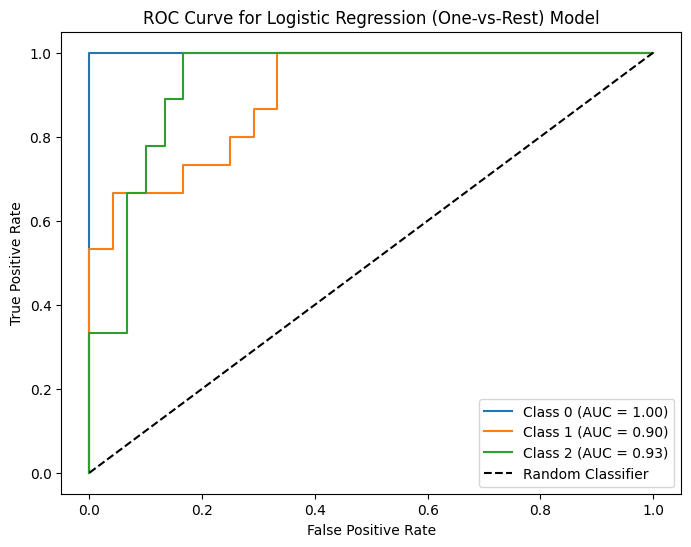

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Get probability estimates for each class from Logistic Regression
y_score_log_reg = log_reg.predict_proba(X_test)

# Binarize the true labels for a One-vs-Rest approach
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Get the number of classes
n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(8, 6))

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score_log_reg[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_score_log_reg[:, i])
    plt.plot(fpr, tpr, label=f'Class {lb.classes_[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Diagonal random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (One-vs-Rest) Model')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Multi-Class Classification without dataset balancing
# Logistic Regression (One-vs-Rest)
lr_ovr = OneVsRestClassifier(LogisticRegression())
lr_ovr.fit(X_train, y_train)
y_pred_lr_ovr = lr_ovr.predict(X_test)

print("\nLogistic Regression (One-vs-Rest) Performance:")
print(classification_report(y_test, y_pred_lr_ovr))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_ovr))


Logistic Regression (One-vs-Rest) Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.80      0.89      0.84         9

    accuracy                           0.92        39
   macro avg       0.91      0.92      0.91        39
weighted avg       0.93      0.92      0.92        39

Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 0  1  8]]


In [ ]:
from sklearn import set_config
# Enable metadata routing for OneVsRestClassifier
set_config(enable_metadata_routing=True)

# Train model with sample weights using OneVsRestClassifier with Logistic Regression
clf = OneVsRestClassifier(LogisticRegression(class_weight=class_weights_dict, max_iter=10000))
clf.estimator.set_fit_request(sample_weight=True)  # Explicitly request sample_weight
clf.fit(X_train, y_train, sample_weight=sw_train)

y_pred = clf.predict(X_test)

# Classification Report and Confusion Matrix
print("\nLogistic Regression (One-vs-Rest) Performance balanced weights:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression (One-vs-Rest) Performance balanced weights:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.60      0.75        15
           2       0.60      1.00      0.75         9

    accuracy                           0.85        39
   macro avg       0.87      0.87      0.83        39
weighted avg       0.91      0.85      0.85        39

Confusion Matrix:
[[15  0  0]
 [ 0  9  6]
 [ 0  0  9]]


In [ ]:
# Logistic Regression (One-vs-One)
lr_ovo = OneVsOneClassifier(LogisticRegression())
lr_ovo.fit(X_train, y_train)
y_pred_lr_ovo = lr_ovo.predict(X_test)

print("\nLogistic Regression (One-vs-One) Performance:")
print(classification_report(y_test, y_pred_lr_ovo))


Logistic Regression (One-vs-One) Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39



#SOFT MAX MODEL

In [ ]:
# Softmax Regression (Multinomial Logistic Regression)
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax.fit(X_train, y_train)
y_pred_softmax = softmax.predict(X_test)

print("\nSoftmax Regression Performance:")
print(classification_report(y_test, y_pred_softmax))



Softmax Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


CONFUSION MATRIX SOFTMAX

<Axes: >

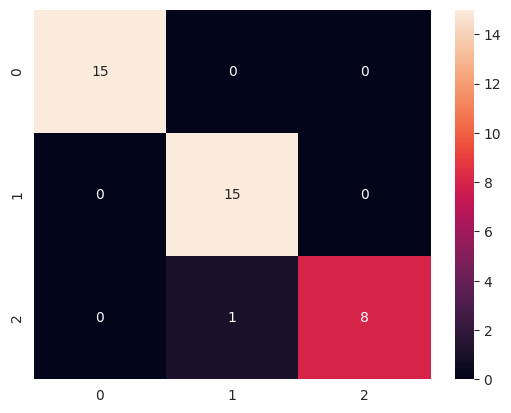

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns # Ensure seaborn is imported if not already in the session

cm=confusion_matrix(y_test,y_pred_softmax)
sns.heatmap(cm,annot=True)

#EVALUATION METRICS


In [ ]:
# Evaluation Metrics
def evaluate_model(y_true, y_pred, y_proba=None):
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    if y_proba is not None:
        print("Log Loss:", log_loss(y_true, y_proba))
        print("ROC AUC Score (OvR):", roc_auc_score(y_true, y_proba, multi_class='ovr'))

# Evaluate Logistic Regression (OvR)


In [ ]:
evaluate_model(y_test, y_pred_lr_ovr, lr_ovr.predict_proba(X_test))

Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.80      0.89      0.84         9

    accuracy                           0.92        39
   macro avg       0.91      0.92      0.91        39
weighted avg       0.93      0.92      0.92        39

Log Loss: 0.31997430412578065
ROC AUC Score (OvR): 0.9817901234567902


DECISION TREE MODEL

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Performance:")
evaluate_model(y_test, y_pred_dt, dt.predict_proba(X_test))


Decision Tree Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.9241962407465939
ROC AUC Score (OvR): 0.9745370370370371


SVM MODEL - ASSIGNMENT

In [ ]:
from sklearn.svm import SVC

# SVM Model
svm = SVC(random_state=42, probability=True) # probability=True is needed for predict_proba
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM Model Performance:")
evaluate_model(y_test, y_pred_svm, svm.predict_proba(X_test))


SVM Model Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.11990061324319548
ROC AUC Score (OvR): 0.9978395061728396


KNN MODEL


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # probability=True is not a valid argument for KNeighborsClassifier
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nKNN Model Performance:")
evaluate_model(y_test, y_pred_knn, knn.predict_proba(X_test))


KNN Model Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.07153062026006998
ROC AUC Score (OvR): 0.9967592592592593


#VISUALISE THE DECISON TREE

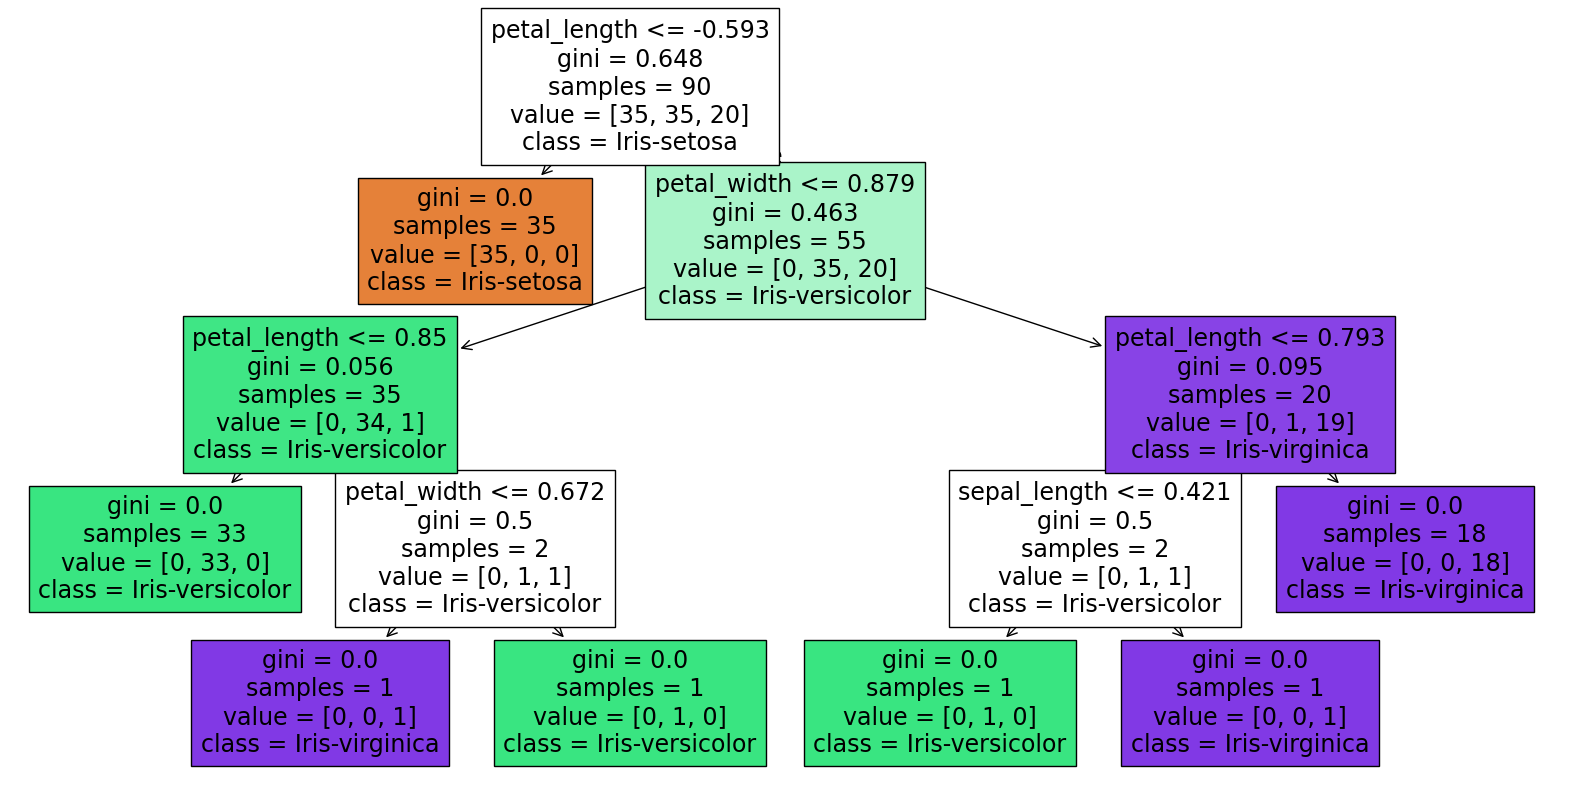

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=le.classes_)
plt.show()

# HYPER PARAMETER TURNING

In [ ]:
# Hyperparameter Tuning (Decision Tree)
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("\nBest Parameters for Decision Tree:")
print(grid_search.best_params_)


Best Parameters for Decision Tree:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


#EVALUATE TUNED DECISIONS

In [ ]:
# Evaluate tuned Decision Tree
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

print("\nTuned Decision Tree Performance:")
evaluate_model(y_test, y_pred_best_dt, best_dt.predict_proba(X_test))


Tuned Decision Tree Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.9419692453763361
ROC AUC Score (OvR): 0.9734567901234569


# MODEL COMPARISON

In [ ]:
# Model Comparison
models = {
    'Logistic Regression (OvR)': lr_ovr,
    'Logistic Regression (OvO)': lr_ovo,
    'Softmax Regression': softmax,
    'Decision Tree': dt,
    'Svm': svm,
    'KNN': knn,
    'Decision Tree (Tuned)': best_dt
}

metrics = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Check if the model is OneVsOneClassifier
    if name == 'Logistic Regression (OvO)':
        # OneVsOneClassifier does not support predict_proba
        metrics.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1': f1_score(y_test, y_pred, average='weighted'),
            'Log Loss': 'Not Available',
            'ROC AUC (OvR)': 'Not Available'
        })
    else:
        # For other models, calculate predict_proba
        y_proba = model.predict_proba(X_test)
        metrics.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1': f1_score(y_test, y_pred, average='weighted'),
            'Log Loss': log_loss(y_test, y_proba),
            'ROC AUC (OvR)': roc_auc_score(y_test, y_proba, multi_class='ovr')
        })

metrics_df = pd.DataFrame(metrics)
print("\nModel Comparison:")
metrics_df


Model Comparison:


,Model,Accuracy,Precision,Recall,F1,Log Loss,ROC AUC (OvR)
0,Logistic Regression (OvR),0.923077,0.926374,0.923077,0.923775,0.319974,0.98179
1,Logistic Regression (OvO),0.974359,0.975962,0.974359,0.974018,Not Available,Not Available
2,Softmax Regression,0.974359,0.975962,0.974359,0.974018,0.15615,1.0
3,Decision Tree,0.974359,0.975962,0.974359,0.974018,0.119901,0.99784
4,Svm,0.974359,0.975962,0.974359,0.974018,0.119901,0.99784
5,KNN,0.974359,0.975962,0.974359,0.974018,0.071531,0.996759
6,Decision Tree (Tuned),0.974359,0.975962,0.974359,0.974018,0.941969,0.973457


### Visualizing Model Comparison Metrics

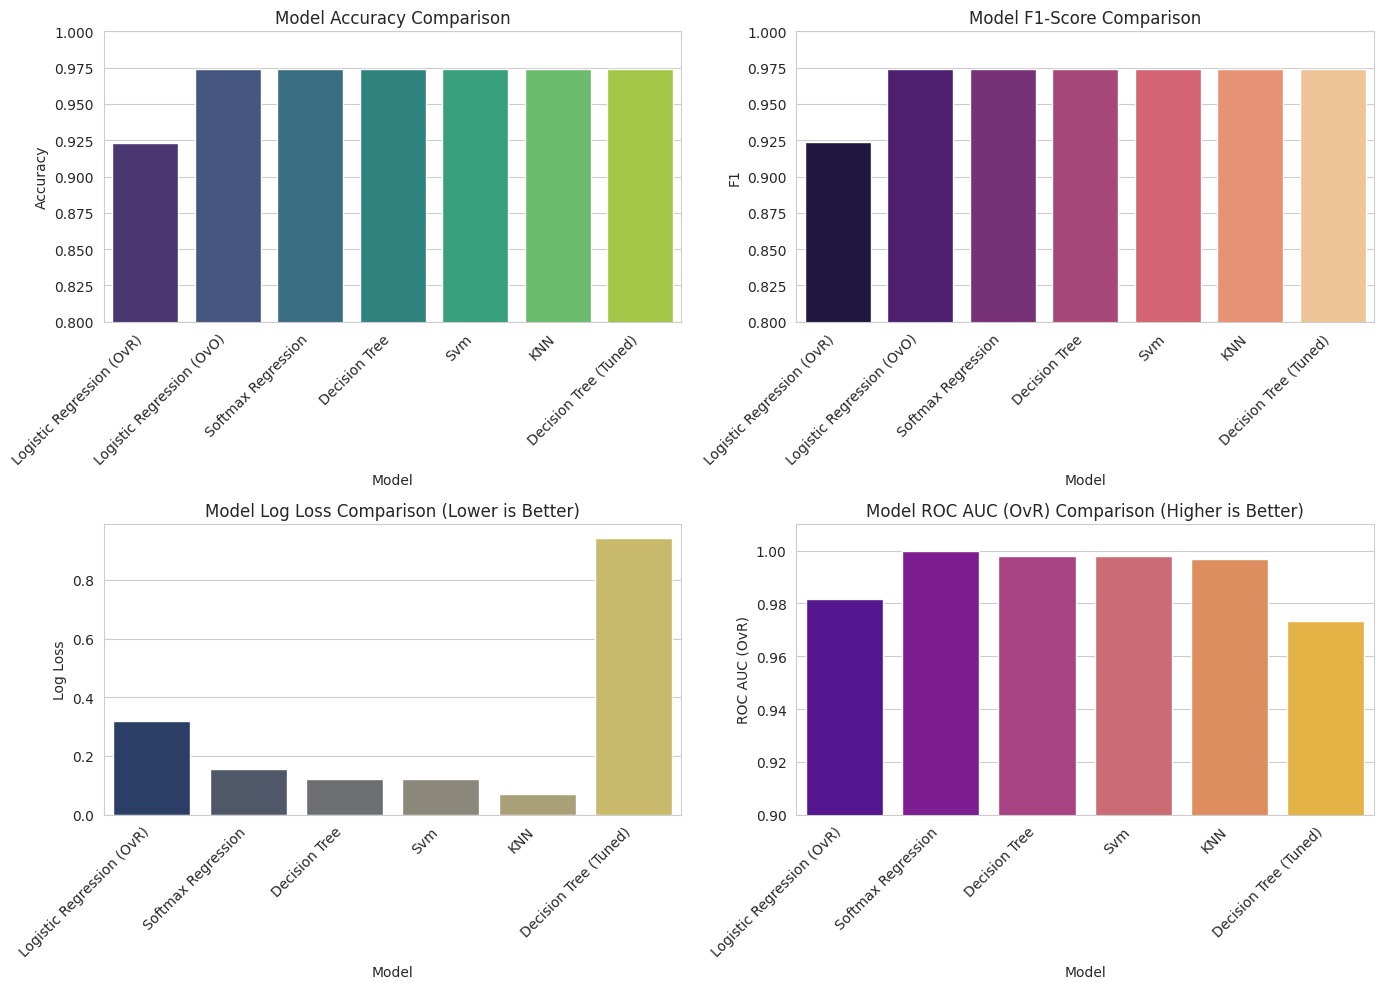

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Set a style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(14, 10))

# Plot 1: Accuracy
plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st plot
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis', hue='Model', legend=False)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0) # Focus on the range of accuracies

# Plot 2: F1-Score
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd plot
sns.barplot(x='Model', y='F1', data=metrics_df, palette='magma', hue='Model', legend=False)
plt.title('Model F1-Score Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)

# Filter out 'Not Available' for Log Loss and ROC AUC for plotting
metrics_df_numeric = metrics_df.copy()
metrics_df_numeric['Log Loss'] = pd.to_numeric(metrics_df_numeric['Log Loss'], errors='coerce')
metrics_df_numeric['ROC AUC (OvR)'] = pd.to_numeric(metrics_df_numeric['ROC AUC (OvR)'], errors='coerce')

# Plot 3: Log Loss
plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd plot
sns.barplot(x='Model', y='Log Loss', data=metrics_df_numeric.dropna(subset=['Log Loss']), palette='cividis', hue='Model', legend=False)
plt.title('Model Log Loss Comparison (Lower is Better)')
plt.xticks(rotation=45, ha='right')

# Plot 4: ROC AUC (OvR)
plt.subplot(2, 2, 4) # 2 rows, 2 columns, 4th plot
sns.barplot(x='Model', y='ROC AUC (OvR)', data=metrics_df_numeric.dropna(subset=['ROC AUC (OvR)']), palette='plasma', hue='Model', legend=False)
plt.title('Model ROC AUC (OvR) Comparison (Higher is Better)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1.01) # Focus on the higher range of AUC scores

plt.tight_layout()
plt.show()